# QBUS6830 Tutorial Lab 2: Single factor CAPM

# Solution Guide

## Data
Get the Kenneth French data on factors and 5 industry portfolios (value-weighted) on a MONTHLY frequency from the files `F-F_Research Data Factors.txt` and `5_Industry Portfolios.txt`. Note that these data files contain Monthly and Annual data so you will have to scroll down to find and select the appropriate data set in each of the text files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import kurtosis
from datetime import datetime

In [2]:
# Import data
dp = lambda x: datetime.strptime(x, '%Y%m')

skip_ff = np.concatenate([np.arange(3),  np.arange(1143, 1243)])
skip_ip = np.concatenate([np.arange(11),  np.arange(1151, 4977)])

data_ff = pd.read_csv('F-F_Research_Data_Factors_m.txt', skiprows=skip_ff, sep='\s+', date_parser=dp)
data_ip = pd.read_csv('5_Industry_Portfolios_m.txt', skiprows=skip_ip, sep='\s+', date_parser=dp)

In [98]:
data_ff

,Mkt-RF,SMB,HML,RF
1926-07-01,2.96,-2.30,-2.87,0.22
1926-08-01,2.64,-1.40,4.19,0.25
1926-09-01,0.36,-1.32,0.01,0.23
1926-10-01,-3.24,0.04,0.51,0.32
1926-11-01,2.53,-0.20,-0.35,0.31
...,...,...,...,...
2021-01-01,-0.03,7.19,2.85,0.00
2021-02-01,2.78,2.11,7.08,0.00
2021-03-01,3.08,-2.48,7.40,0.00
2021-04-01,4.93,-3.09,-0.74,0.00


In [99]:
data_ip

,Cnsmr,Manuf,HiTec,Hlth,Other
1926-07-01,5.43,2.73,1.83,1.77,2.16
1926-08-01,2.76,2.33,2.41,4.25,4.38
1926-09-01,2.16,-0.44,1.06,0.69,0.29
1926-10-01,-3.90,-2.42,-2.26,-0.57,-2.85
1926-11-01,3.70,2.50,3.07,5.42,2.11
...,...,...,...,...,...
2021-01-01,0.74,-0.97,0.11,2.85,-2.82
2021-02-01,-1.91,5.86,2.04,-1.10,9.53
2021-03-01,5.22,7.23,0.84,0.22,5.58
2021-04-01,5.82,2.49,6.14,3.21,5.81


### Task 1
Form the excess returns on each industry portfolio and the excess returns on the market. Plot the industry portfolio and market index excess returns over time. Find summary statistics for each of the six return series. Comment and discuss. 

Recall that an asset's excess return at time $t$ is simply $R_t - R_t^f$, where $R_t^f$ is the risk-free rate of return.

### Why Risk-Free rate of return

So I'm not sure if the lectures went through this, but it won't hurt for me to go through it again. As we all should know, different investments will have different risk, and the risk can be indirectly measured by the returns. More specifically, the higher the risk of the asset then the higher we should expect the return.

But, we have what is known as the risk-free rate of return. This risk-free rate is the return that you get when you invest in a 100% safe asset (or close to 100% safe). Typically, we consider the risk-free rate as the U.S. treasury rate, which is basically a bond that is backed by the U.S. government. This is therefore considered as the risk-free rate as we don't expect the U.S. to default on the bonds (some countries actually do this btw).

We are interested in the excess return because you better hope that if you are investing in something risky, then it better give higher returns than something that is 100% risk-free.

In [100]:
exr_cnsmr = data_ip['Cnsmr'] - data_ff['RF']
exr_manuf = data_ip['Manuf'] - data_ff['RF']
exr_hitec = data_ip['HiTec'] - data_ff['RF']
exr_hlth = data_ip['Hlth'] - data_ff['RF']
exr_other = data_ip['Other'] - data_ff['RF']
exr_mkt = data_ff['Mkt-RF']

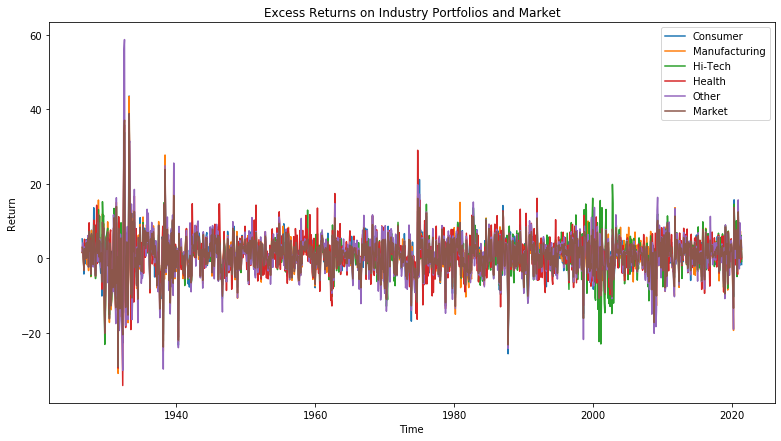

In [101]:
plt.figure(figsize=(13, 7))
plt.plot(exr_cnsmr, label='Consumer')
plt.plot(exr_manuf, label='Manufacturing')
plt.plot(exr_hitec, label='Hi-Tech')
plt.plot(exr_hlth, label='Health')
plt.plot(exr_other, label='Other')
plt.plot(exr_mkt, label='Market')
plt.xlabel('Time')
plt.ylabel('Return')
plt.title('Excess Returns on Industry Portfolios and Market')
plt.legend()
plt.show()

In [106]:
exr_ip

,Cnsmr,Manuf,HiTec,Hlth,Other
1926-07-01,5.21,2.51,1.61,1.55,1.94
1926-08-01,2.51,2.08,2.16,4.00,4.13
1926-09-01,1.93,-0.67,0.83,0.46,0.06
1926-10-01,-4.22,-2.74,-2.58,-0.89,-3.17
1926-11-01,3.39,2.19,2.76,5.11,1.80
...,...,...,...,...,...
2021-01-01,0.74,-0.97,0.11,2.85,-2.82
2021-02-01,-1.91,5.86,2.04,-1.10,9.53
2021-03-01,5.22,7.23,0.84,0.22,5.58
2021-04-01,5.82,2.49,6.14,3.21,5.81


In [8]:
exr_ip = data_ip.sub(data_ff['RF'], axis=0)
exr = exr_ip.merge(data_ff['Mkt-RF'], left_index=True, right_index=True)
exr

,Cnsmr,Manuf,HiTec,Hlth,Other,Mkt-RF
1926-07-01,5.21,2.51,1.61,1.55,1.94,2.96
1926-08-01,2.51,2.08,2.16,4.00,4.13,2.64
1926-09-01,1.93,-0.67,0.83,0.46,0.06,0.36
1926-10-01,-4.22,-2.74,-2.58,-0.89,-3.17,-3.24
1926-11-01,3.39,2.19,2.76,5.11,1.80,2.53
...,...,...,...,...,...,...
2021-01-01,0.74,-0.97,0.11,2.85,-2.82,-0.03
2021-02-01,-1.91,5.86,2.04,-1.10,9.53,2.78
2021-03-01,5.22,7.23,0.84,0.22,5.58,3.08
2021-04-01,5.82,2.49,6.14,3.21,5.81,4.93


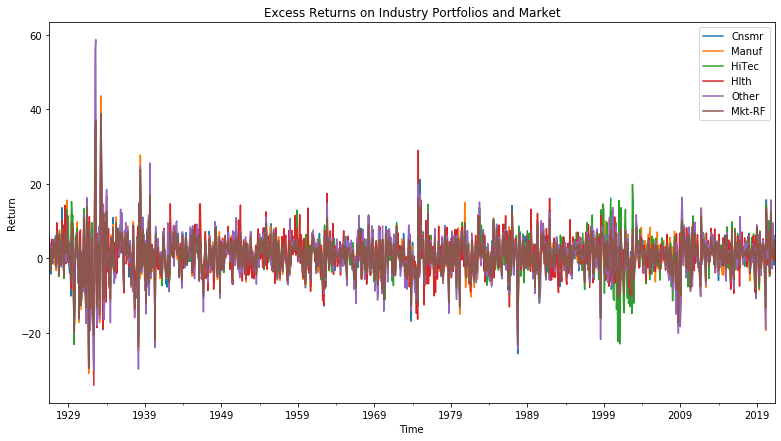

In [69]:
exr.plot(figsize=(13, 7))
plt.xlabel('Time')
plt.ylabel('Return')
plt.title('Excess Returns on Industry Portfolios and Market')
plt.legend()
plt.show()

In [10]:
descriptive = exr.describe()
descriptive.loc['skew', :] = exr.skew()
descriptive.loc['kurt', :] = kurtosis(exr, fisher=False)
descriptive.round(4)

,Cnsmr,Manuf,HiTec,Hlth,Other,Mkt-RF
count,1139.0000,1139.0000,1139.0000,1139.0000,1139.0000,1139.0000
mean,0.7579,0.6936,0.7306,0.8196,0.6612,0.6882
std,5.2793,5.5281,5.5779,5.5402,6.4151,5.3450
min,-28.6100,-30.8900,-26.8100,-34.1400,-30.0900,-29.1300
25%,-1.9250,-2.0050,-2.0550,-2.1900,-2.3500,-1.9700
50%,0.9700,0.9600,0.9700,0.8200,1.0300,1.0600
75%,3.6000,3.5650,3.8250,3.8200,3.9050,3.6500
max,43.5700,43.4300,33.8100,37.0300,58.7200,38.8500
skew,0.1104,0.3524,-0.1973,0.0988,0.8199,0.1658
kurt,10.4278,11.7518,6.4898,9.6178,15.8924,10.5963


**Answer guide**
The monthly industry and market excess returns look very similar when plot over time. Volatility seems highest in all series in the 1930s, even higher than during the GFC period in 2008. Hi-tech sector had a high volatility period in the 1999-2000 period, which none of the other series had. All excess return series have positive mean returns around 0.6-0.8% andmonthly returns ranging between about -30% up to 30% or 40% or even 60% (Other sector). All sectors and the market ecess returns have positive excess kurtosis and positive skew, except for HiTec which has negative skew. In all series, the middle 50% of monthly returns ranges from about -2% up to about 4%.  

## Task 2 
Plot the histograms and density plots of all excess return series and assess whether these returns could be Gaussian or not. 

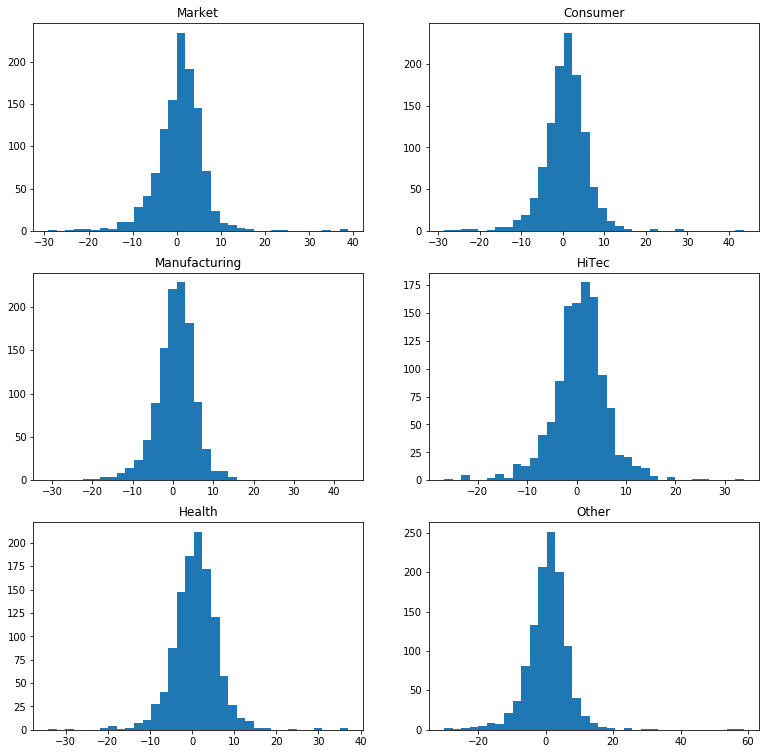

In [11]:
fig, ax = plt.subplots(3, 2, figsize=(13, 13))

ax[0, 0].hist(exr['Mkt-RF'], 35)
ax[0, 0].set_title('Market')

ax[0, 1].hist(exr['Cnsmr'], 35)
ax[0, 1].set_title('Consumer')

ax[1, 0].hist(exr['Manuf'], 35)
ax[1, 0].set_title('Manufacturing')

ax[1, 1].hist(exr['HiTec'], 35)
ax[1, 1].set_title('HiTec')

ax[2, 0].hist(exr['Hlth'], 35)
ax[2, 0].set_title('Health')

ax[2, 1].hist(exr['Other'], 35)
ax[2, 1].set_title('Other')

plt.show()

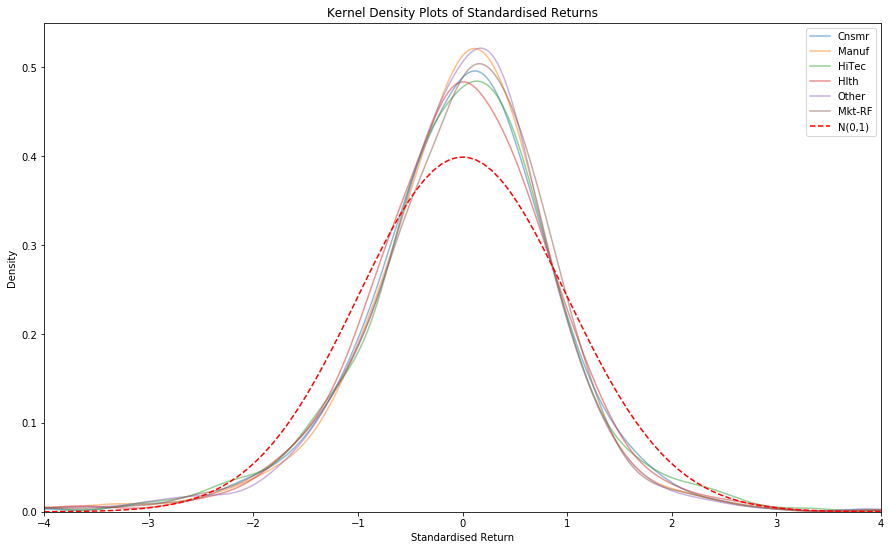

In [81]:
exr_std = (exr - exr.mean(axis=0)) / exr.std(axis=0)
exr_std.plot.kde(figsize=(15, 9), alpha=0.5)
x = np.linspace(-4, 4, 100)
plt.plot(x, stats.norm.pdf(x), 'r--', label='N(0,1)')
plt.axis([-4, 4, 0, 0.55])
plt.xlabel('Standardised Return')
plt.title('Kernel Density Plots of Standardised Returns')
plt.legend()
plt.show()

**Answer guide**
All series seemed fat-tailed and peaked in the middle, compared to a Gaussian distribution. All histograms show potential outlying monthly returns, i.e. a small number of returns that are quite separate and more extreme than the rest. All return series do not seem close to Gaussian.

BTW QQplots could and should also have been used here. I encourage students to form these plots and assess normality based on these too. 

### Task 3
Construct a scatterplot of each excess industry return against the excess market return series. Comment on the apparent relationships and on whether outliers may be a problem/issue in any statistical ananlysis.

In [116]:
exr

,Cnsmr,Manuf,HiTec,Hlth,Other,Mkt-RF
1926-07-01,5.21,2.51,1.61,1.55,1.94,2.96
1926-08-01,2.51,2.08,2.16,4.00,4.13,2.64
1926-09-01,1.93,-0.67,0.83,0.46,0.06,0.36
1926-10-01,-4.22,-2.74,-2.58,-0.89,-3.17,-3.24
1926-11-01,3.39,2.19,2.76,5.11,1.80,2.53
...,...,...,...,...,...,...
2021-01-01,0.74,-0.97,0.11,2.85,-2.82,-0.03
2021-02-01,-1.91,5.86,2.04,-1.10,9.53,2.78
2021-03-01,5.22,7.23,0.84,0.22,5.58,3.08
2021-04-01,5.82,2.49,6.14,3.21,5.81,4.93


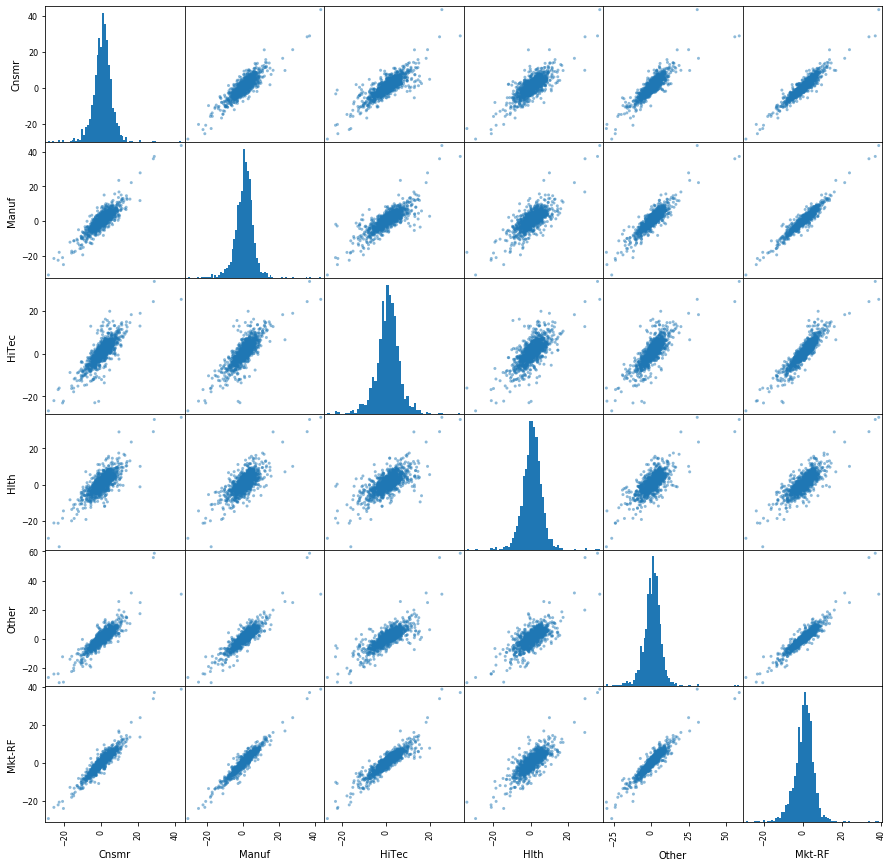

In [118]:
pd.plotting.scatter_matrix(exr, hist_kwds={'bins': 'auto'}, figsize=(15, 15))
plt.show()

**Answer guide**
All sector exess returns are positively related to market excess returns. Further all sector excess returns are positively related to all of the other sectors. In each plot, most of the observations seem to lie in a fairly tight "cloud" around a positively sloped straight line. However in most plots, a small number of observations seem not to follow the general pattern; these all seem to be for relatively extreme or outlying sector or market excess returns. These outliers may indeed affect a regression analysis and cast doubt on the assumptions underlying it.  

### Task 4
Calculate the pairwise correlations between each industry and market return series. Test whether each is different to 0 (or not) at the 5% level.

Recall the test statistic for sample correlation is given by
$$t = \frac{\hat{\rho}\sqrt{T - 2}}{\sqrt{1-\hat{\rho}^2}}$$
which follows a t-distribution with $T - 2$ degrees of freedom. 

In [120]:
corr_mat = exr.corr()
corr_mat

,Cnsmr,Manuf,HiTec,Hlth,Other,Mkt-RF
Cnsmr,1.000000,0.871387,0.814577,0.778545,0.874187,0.937031
Manuf,0.871387,1.000000,0.807340,0.744372,0.892324,0.956247
HiTec,0.814577,0.807340,1.000000,0.710112,0.799294,0.909996
Hlth,0.778545,0.744372,0.710112,1.000000,0.738818,0.805894
Other,0.874187,0.892324,0.799294,0.738818,1.000000,0.936050
Mkt-RF,0.937031,0.956247,0.909996,0.805894,0.936050,1.000000


In [121]:
corr_mkt = corr_mat.iloc[0:5, 5]
corr_mkt

Cnsmr    0.937031
Manuf    0.956247
HiTec    0.909996
Hlth     0.805894
Other    0.936050
Name: Mkt-RF, dtype: float64

In [123]:
# Test statistic
T = len(exr)
t = corr_mkt * np.sqrt(T - 2) / np.sqrt(1 - corr_mkt ** 2)
print(t)

Cnsmr     90.469675
Manuf    110.213528
HiTec     74.006728
Hlth      45.897843
Other     89.702027
Name: Mkt-RF, dtype: float64


In [124]:
# P-value
p = 2 * stats.t.cdf(-np.abs(t), df=(T - 2))
print(p)

[0.00000000e+000 0.00000000e+000 0.00000000e+000 4.43995883e-261
 0.00000000e+000]


In [18]:
tbl_corr_mkt = pd.DataFrame({'Correlation': corr_mkt.round(4), 'p-value': p.round(4)})
tbl_corr_mkt

,Correlation,p-value
Cnsmr,0.9370,0.0
Manuf,0.9562,0.0
HiTec,0.9100,0.0
Hlth,0.8059,0.0
Other,0.9361,0.0


In [19]:
# An alternative method (as used in lecture code)
c = np.empty(5)
p = np.empty(5)
for i in range(5):
    (c[i], p[i]) = stats.pearsonr(exr.iloc[:, i], exr['Mkt-RF'])
tbl_corr_mkt = pd.DataFrame({'Correlation': c.round(4), 'p-value': p.round(4)})
tbl_corr_mkt.index = exr.columns[:5]
tbl_corr_mkt

,Correlation,p-value
Cnsmr,0.9370,0.0
Manuf,0.9562,0.0
HiTec,0.9100,0.0
Hlth,0.8059,0.0
Other,0.9361,0.0


### p-values

In this course we love our p-values, so it is a good idea to make the concept more clear.

https://www.vox.com/latest-news/2019/3/22/18275913/statistical-significance-p-values-explained

One good way to interpret p-value is that, the p-value can be though of as the probability that the data is observed given the null hypothesis is true.

In this case, when we are doing correlation testing, the null hypothesis is $\rho = 0$, meaning that the correlation is 0. So given the assumption that there is no correlation, what is the probability we observed the dataset.

In this case, given the assumption that the correlation between consumers and market returns is 0, the probability that we see the following dataset is 0.0. Since this is so unlikely, we reject the null and accept the alternate which is that correlation is non-zero.

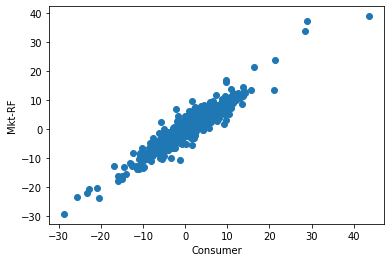

In [55]:
plt.scatter(exr['Cnsmr'], exr['Mkt-RF']);

plt.xlabel('Consumer')
plt.ylabel('Mkt-RF');

Suppose, instead that we did some calculations and the p-value of the correlation is 0.04. Well in this case, given the assumption (of the null hypothesis) that the correlation between consumers and market returns is 0, the probability that we see the following dataset is 3.9%.

It is important to recognise that the conumser returns and market returns are essential random variables. So it is very possible that if you resampled the dataset, then you will get a different p-value.

A p-value of 3.9% therefore says that, if you were to resample the dataset 100 times then you will expect to see the sampled data about 3.9 times. When we set a rejection level (of 5% or 1%) what we are doing is saying that there is a level at which we reject the assumption of no correlation because your dataset is just too unlikely (under the assumption of the null hypothesis). 

So when we set the rejection level to 5%, all we simply say is that it is too unlikely if it occurs 5 out of 100 times. The 1% level would therefore be a more stronger assertion, because you need it to occur 1 out of 100 times. 

Which level you choose really depends on what you are doing. If you are doing just basic data analysis, with no real world impact then a 5% level is fine. If you are doing medical research and the null hypothesis is: patients who take your drug die, then you want a much lower p-vale (lower than 1%).

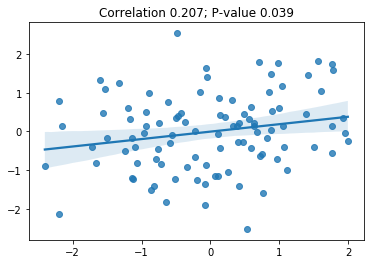

In [54]:
from scipy.stats import pearsonr
import seaborn as sns

np.random.seed(59)
x = np.random.normal(size=100)
y = np.random.normal(size=100)

corr, p_value = pearsonr(x, y)
plt.title(f"Correlation {round(corr, 3)}; P-value {round(p_value, 3)}")
sns.regplot(x=x, y=y);

**Answer guide**
Clearly, all correlations between each sector return and the market excess returns, are highly positive. The hypothesis tests run all have the same form:

$H_0 : \rho = 0$ vs $H_1: \rho \neq 0$

The t-statistic formula is given above. The p-value is the probability of observing a Student-t distribution with $T-2 = 1139-2 = 1137$ degrees of freedom is more extreme than the observed t-stat (in both tails). Each p-value is 0.0000 to many, many decimal places. Any significan level we choose (usually we choose $\alpha =$ 0.05 or 0.01) will be larger than these p-values. Thus in each case we can reject the null hypothesis and we conclude that each correlation is significantly different to 0. 

Each sector's excess return is very strongly significantly linearly and positively related to the excess market return series.

### CAPM 
The Capital Asset Pricing Model is quite a fundamental model and is very simple. If $R_t$ is the returns of some asset, then CAPM says that the excess returns follows the formula

$$R_t - R^f_t = \alpha + \beta (R^m_t - R_t^f)$$

So $\alpha$ is considered as the average excess returns - meaning on average, we expect the asset to return $\alpha$ over the current risk-free rate. So if the risk-free rate was 0.15%, then on average we should expect the stock to return $(\alpha + 0.15)$%.

$\beta$ is then considered to be the market sensitivity - meaning how sensitive the asset is to **general market movements**. Just using basic interpretation of linear regression, if the market returns $R^m_t$ increased by 1, then we expect our asset's return to increase by $\beta$.

For example, suppose that we did our analysis and our model returned the following

$$R_t - R^f_t = 0.01 + 0.9 (R^m_t - R_t^f)$$

Here
- On average we expect a 0.01 return over the risk free rate
- Our asset is only 90% sensitive to market movements. Meaning, that if the market returns increase by 1 unit, then we expect our returns to increase only by 0.9 units.

Therefore, one quick way to measure risk is by looking at this value of $\beta$. When $\beta > 1$ would indicated that market movements will be amplified (think if $\beta = 2$, then if market returns increase by 1 unit, then on average your stock will increase by 2 units). So a higher value of $\beta$ would indicated a more riskier asset.

Note, however, this only measures market risk not any other risks. This is because $\beta$ only tells you how the stock changes with respect to the market, nothing else.

Now, the asset's risk is actually decomposed into 3 things
1. Company Risk - Think about CBA, company risk is the risk that only CBA has and no other company
2. Sector Risk - Think about CBA, this would be the risk because CBA exists in the financial sector
3. Market Risk - Think about CBA, this is the risk because CBA exists in the australian market

Another way to measure risk is to simply look at the variance in the returns. The higher the variance the the more riskier the stock, and we will look at more sophisticated ways of doing this later.

Also you need to be careful to compare it to the right market. For example, if the market risk you are using is the U.S. market, but your asset primarily trades in Russia then it makes no sense to be comparing it with the U.S. market risk.

### Task 5
Fit the single factor CAPM to each excess industry return series and report the estimates as well as 95% intervals for each estimate. Briefly comment.

Recall that the single factor CAPM follows 
$$y_t = \alpha + \beta x_t + \epsilon_t$$
where $y_t = R_t - R_t^f$ and $x_t = R_t^m - R_t^f$.

In [87]:
X = sm.add_constant(exr['Mkt-RF'])

res = np.empty(5, dtype=object)
a = np.empty(5)
b = np.empty(5)
ci_a = np.empty(5, dtype=object)
ci_b = np.empty(5, dtype=object)

for i in range(5):
    res[i] = sm.OLS(exr.iloc[:, i], X).fit()
    
    a[i] = res[i].params[0].round(4)
    b[i] = res[i].params[1].round(4)
    
    ci = res[i].conf_int(alpha=0.05)
    
    ci_a[i] = '({:.4f}, {:.4f})'.format(ci.iloc[0, 0], ci.iloc[0, 1])
    ci_b[i] = '({:.4f}, {:.4f})'.format(ci.iloc[1, 0], ci.iloc[1, 1])

tbl_coef = pd.DataFrame(data={'alpha': a, 'CI_alpha': ci_a, 'beta': b, 'CI_beta': ci_b}) 
tbl_coef.index = exr.columns[:5]
tbl_coef

,alpha,CI_alpha,beta,CI_beta
Cnsmr,0.1210,"(0.0129, 0.2291)",0.9255,"(0.9054, 0.9456)"
Manuf,0.0130,"(-0.0819, 0.1078)",0.9890,"(0.9714, 1.0066)"
HiTec,0.0771,"(-0.0585, 0.2127)",0.9497,"(0.9245, 0.9748)"
Hlth,0.2448,"(0.0524, 0.4371)",0.8353,"(0.7996, 0.8710)"
Other,-0.1120,"(-0.2443, 0.0204)",1.1235,"(1.0989, 1.1480)"


https://cdn-images-1.medium.com/max/498/1*Bt1LjOBnr9vkwPTotwM2yA.png

**Answer guide**
Each sector is estimated to have a high positive market $\beta$ that seems reasonably close to 1. Each sector's market $\alpha$ is estimated as positive, except that for the Other sector; though all estimates are reasonably close to 0. All sectors seem to have a fairly similar positive linear relationship with the market excess return, as posited by the CAPM model.

### Task 6 
Discuss whether the assumptions made in these analyses might be valid or not.

Recall that the three LS assumptions commonly applied in regression analyses are:

1. The independent variable $x_t$ and the errors $\epsilon_t$ are uncorrelated, i.e., $E(\epsilon_t | x_t) = 0$
2. The sample of data pairs $(x_1, y_1)$, ..., $(x_T, y_T)$ is IID
3. Both $x$ and $y$ have finite 4th moments, i.e., $E(x^4) < \infty$, $E(y^4) < \infty$

Residual plots can help us identify potential violations of the the LS assumptions. For time series data, it can be helpful to colour-code the scatter-plots based on time, so that the colour of a dot tells us approximately the corresponding period in the sample.

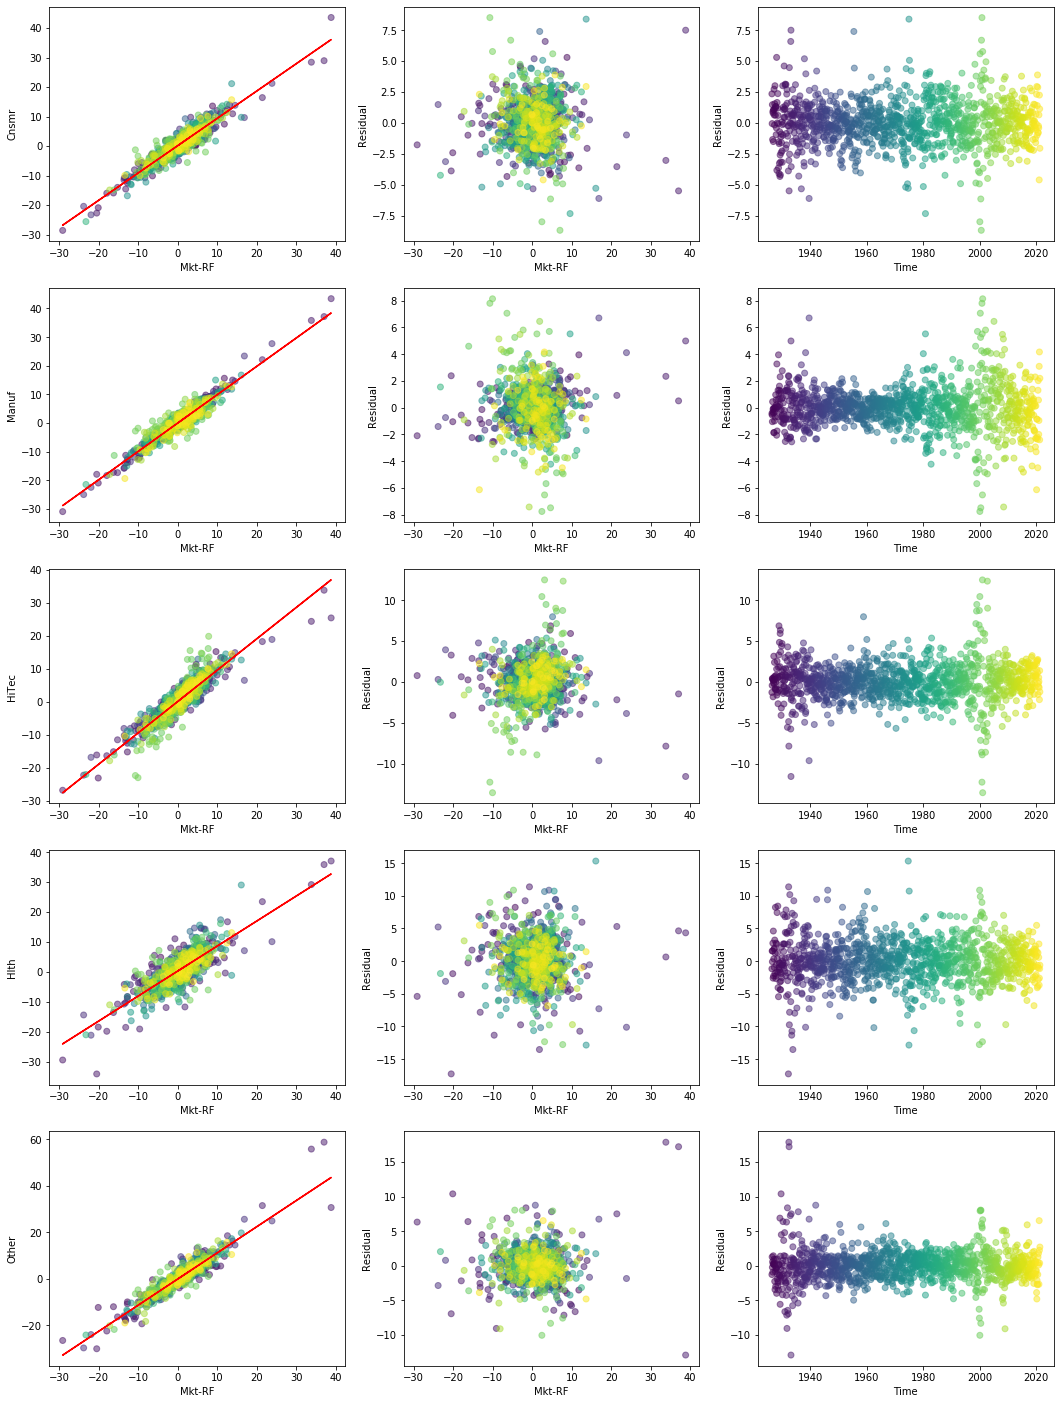

In [21]:
fig, ax = plt.subplots(5, 3, figsize=(18, 25))
for i in range(5):
    e = res[i].resid
    ax[i, 0].scatter(exr['Mkt-RF'], exr.iloc[:, i], c=range(T), alpha=0.5)
    ax[i, 0].plot(exr['Mkt-RF'], res[i].fittedvalues, 'r-')
    ax[i, 0].set_xlabel('Mkt-RF')
    ax[i, 0].set_ylabel(exr.columns[i])
    ax[i, 1].scatter(exr['Mkt-RF'], e, c=range(T), alpha=0.5)
    ax[i, 1].set_xlabel('Mkt-RF')
    ax[i, 1].set_ylabel('Residual')
    ax[i, 2].scatter(e.index, e, c=range(T), alpha=0.5)
    ax[i, 2].set_xlabel('Time')
    ax[i, 2].set_ylabel('Residual')
plt.show()

**Answer guide**
First, the residual plots clearly show potential outliers. Loosely, these are the residuals in the far corners of the (middle) plots, of residuals against excess market returns. he linear model seems to be far less accurate at predicting sector returns when market excess returns are extreme, positive or negative; creating residuals that seem often much further from 0 than for non-extreme market excess returns. From the time series residual plots, these outliers occur mainly in the 1930s, though not for Manufacturing, and in the 1999-2000 time period. These seem to be periods where the market excess return, via the CAPM, was not a reliable predictor of the sector excess returns. Specifically this casts doubt on all 3 LS assumptions, at last in those time periods. The lack of predictability seems to violate assumption 1, the time specific nature of it violate assumption 2 and the extreme outliers cast doubt on assumption 3.     

### Task 7
Report on how well and how strongly the CAPM fits each industry portfolio data set.

In [22]:
r2 = np.zeros(5)
ser = np.zeros(5)
for i in range(5):
    r2[i] = res[i].rsquared.round(4)
    ser[i] = np.sqrt(res[i].mse_resid).round(4)
tbl_fit = pd.DataFrame(data={'R Squared': r2, 'SER': ser}) 
tbl_fit.index = exr.columns[:5]
tbl_fit

,R Squared,SER
Cnsmr,0.8780,1.8446
Manuf,0.9144,1.6180
HiTec,0.8281,2.3137
Hlth,0.6495,3.2816
Other,0.8762,2.2582


**Answer guide**
Four sectors have R-squared values above 80%, indicating very strong fits for the CAPM model. The Health sector has an R-squared of 65%, indicating a moderately strong fit of the CAPM model. The SER values for each sector reflect the R-squared values; e.g. for Manufacturing the SER is 1.62%, indicating that the typical error in predicting Manuf excess return by the CAPM is 1.62% (same scale as returns).  

### Task 8 
Assess whether each industry could be classed as high, medium or low market risk. Provide a test or interval to support your conclusions.

In [23]:
tbl_beta = tbl_coef.iloc[:, 2:4]
tbl_beta

,beta,CI_beta
Cnsmr,0.9255,"(0.9054, 0.9456)"
Manuf,0.9890,"(0.9714, 1.0066)"
HiTec,0.9497,"(0.9245, 0.9748)"
Hlth,0.8353,"(0.7996, 0.8710)"
Other,1.1235,"(1.0989, 1.1480)"


**Answer guide**
The CIs above are at confidence level 95%. We are 95% confident that the true market beta, in each case is inside the 95% CI. Thus, we can say we are at least 95% confident that the Consumer, HiTec and Health sectors exhibit low market risk. We are 95% confident that the Other sector exhibits high market risk. Finally, the Manufacturing sector has a market beta not significantly different to 1, indicating it exhibits medium market risk.

### Task 9
Are there any changes in conclusions from using daily data, as in lecture, to monthly data? Any other issues?